# Hugging Face  – Notes

(Prepared with reference to Kanav Bansal’s notes)

### Introduction
Hugging Face is an open-source AI company best known for its contributions to Natural Language Processing (NLP).
It provides pre-trained models, tools, and a thriving community to make modern AI accessible and practical.

### Hugging Face Hub
A centralized platform offering:

Models Hub: Thousands of ready-to-use models (e.g., BERT, GPT, T5).

Datasets Hub: Curated datasets for ML tasks.

Spaces: Interactive demos of ML models in the browser.

Inference & AutoTrain: Simple APIs and automation tools for deployment and training.

Multimodal Support: Beyond text, it covers vision, audio, and cross-modal applications.

### Key Libraries
**Transformers:** Core library for state-of-the-art transformer models across NLP, vision, audio, and multimodal tasks.

**Datasets:** Efficient tools for loading and processing datasets.

**Tokenizers:** Optimized tokenization library for splitting text into tokens.

**Evaluate:** Tools for computing evaluation metrics.

**Accelerate:** Simplifies distributed and multi-GPU training.

### Why Hugging Face?
Open Source: Encourages collaboration and faster advancements.

Framework Agnostic: Works with PyTorch, TensorFlow, and JAX.

Pretrained Models: Save time, cost, and resources by leveraging existing models.

Easy APIs: Build powerful applications with minimal code.

### Transformers Library

Capabilities

Supports a wide range of tasks:

NLP: Text classification, NER, question answering, summarization, translation, text generation.

Computer Vision: Image classification, object detection, segmentation.

Audio: Speech recognition, audio classification.

Multimodal: OCR, visual question answering, video classification, table QA.

Framework Interoperability
Use PyTorch, TensorFlow, or JAX interchangeably.

Export models to ONNX/TorchScript for production.

### Pipelines in Hugging Face

**What is a Pipeline?**

A high-level API that abstracts away model loading and preprocessing so you can perform complex ML tasks in just a few lines.

Common Supported Tasks
Text: Classification, NER, summarization, QA, translation, text generation, fill-mask, feature extraction.

Vision: Image classification, object detection, image segmentation.

**Behind the Scenes**

Loads a pre-trained model.

Handles tokenization (or image preprocessing).

Runs inference.

Returns human-readable results.

**Key Takeaways**

Hugging Face simplifies access to cutting-edge ML models.

The Hub + Transformers library = a strong foundation for NLP, CV, and multimodal projects.

Pipelines make experimentation quick and intuitive.

**These notes are my restructured version, prepared while studying Kanav Bansal’s Hugging Face notebook.**

In [1]:
import transformers

In [2]:
print(transformers.__version__)

4.54.1


In [1]:
# step 1 import pipeline
from transformers import pipeline

model : for sentiment analysis

**distilbert-base-uncased-finetuned-sst-2-english**

Base Model: DistilBERT

A lighter and faster version of BERT (about 40% smaller).

“uncased” → ignores case (treats Obama and obama the same).

Fine-tuning Dataset: SST-2 (Stanford Sentiment Treebank v2)

This dataset contains sentences labeled as positive or negative.

Example:

"I love this movie" → POSITIVE

"This film was terrible" → NEGATIVE

Purpose: Sentiment Analysis

Predicts whether text expresses a positive or negative sentiment.

It’s a text-classification model.


In [10]:
# specify the task
classifier = pipeline(task="text-classification", framework="pt",
                     model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not inst

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [15]:
positive_text = "I really enjoy working on AI projects!"
negative_text = "Unfortunately you are not selected for data science internship program"

In [16]:
# passing the input to the pipeline
classifier(positive_text)

[{'label': 'POSITIVE', 'score': 0.9993218183517456}]

In [17]:
classifier(negative_text)

[{'label': 'NEGATIVE', 'score': 0.997680127620697}]

### Named entity recognition


**What is NER?**

Named Entity Recognition (NER) is a Natural Language Processing (NLP) task that identifies and classifies real-world entities in text into predefined categories such as:

PER → Person names (e.g., Barack Obama)

ORG → Organizations (e.g., United Nations)

LOC → Locations (e.g., Honolulu, Hawaii)

DATE → Dates (e.g., August 4, 1961)

MISC → Miscellaneous (e.g., Olympics, COVID-19)

It’s a sub-task of Information Extraction.

**Why Do We Use NER?**

NER is used when you want to extract structured information from unstructured text.
Typical applications include:

Information Retrieval

Search engines highlight and rank results by entities (e.g., “Hotels in Paris”).

Business Analytics

Extract companies, products, or stock tickers from news articles.

Healthcare

Identify diseases, medicines, or patient details from clinical reports.

Customer Support

Extract customer names, locations, or complaint details from chat logs.

Document Summarization

Identify key players, places, and dates from long reports.

Knowledge Graph Construction

Build links between people, places, and events.

**When to Use NER**

You use NER when:

You need to know the “who/where/when” in a text.

Your goal is to structure text data into specific fields (like Person, Date, Location).

You want to analyze text beyond just sentiment — extracting factual information.

Example:
Instead of just saying “This sentence is POSITIVE”, you want to know “Who is mentioned? When? Where?”

In [42]:
ner = pipeline(task="ner",
               framework="pt",
               grouped_entities=True, 
               model="dslim/bert-base-NER")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [45]:
sample1="Rushikesh is data scientist and working in pune, india"

In [46]:
ner(sample1)

[{'entity_group': 'PER',
  'score': 0.93715113,
  'word': 'Rushikesh',
  'start': 0,
  'end': 9}]

### summarization

In [2]:
summarizer = pipeline(task="summarization",
                     model="Falconsai/text_summarization")

config.json: 0.00B [00:00, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--Falconsai--text_summarization. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [3]:
sample2= """
Artificial Intelligence (AI) has rapidly evolved over the last decade, influencing numerous sectors including healthcare, finance, education, and transportation. 
In healthcare, AI assists doctors by analyzing medical images and predicting patient outcomes. 
In finance, it helps detect fraud and provides personalized investment strategies. 
Educational platforms now leverage AI to create adaptive learning systems tailored to individual students’ needs. 
Meanwhile, in transportation, AI powers self-driving cars and optimizes traffic management systems. 
As AI continues to advance, it promises to make everyday life more efficient, though ethical considerations such as privacy and job displacement remain critical issues.
"""

In [6]:
summarizer(sample2, max_length=50)

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'summary_text': 'AI has rapidly evolved over the last decade, influencing healthcare, finance, education, and transportation . In healthcare, AI assists doctors by analyzing medical images and predicting patient outcomes . Educational platforms now leverage AI to create adaptive learning systems tailored to individual students’ needs .'}]

### Question Answering

In [7]:
reader = pipeline(task="question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--distilbert--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not in

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [11]:
question1 = "How is Artificial Intelligence being used in the healthcare sector?"

In [12]:
reader(question=question1, context = sample2)

{'score': 0.5006645321846008,
 'start': 182,
 'end': 257,
 'answer': 'assists doctors by analyzing medical images and predicting patient outcomes'}

In [13]:
question2 = "What role does AI play in the field of transportation?"

In [14]:
reader(question=question2, context = sample2)

{'score': 0.593788743019104,
 'start': 492,
 'end': 557,
 'answer': 'powers self-driving cars and optimizes traffic management systems'}

In [15]:
question3 = "What ethical concerns are associated with the advancement of AI?"

In [16]:
reader(question=question3, context = sample2)

{'score': 0.7182481288909912,
 'start': 676,
 'end': 704,
 'answer': 'privacy and job displacement'}

### Translation

In [17]:
translation = pipeline("translation_en_to_fr")

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--google-t5--t5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regula

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [19]:
sample_text = """
                Congratulations John – Welcome to the AI Research Internship!

Dear John,

Congratulations! 🎉

We are excited to announce that you have been selected for the AI Research Internship, starting on the 15th of this month. 
Your outstanding application and passion for artificial intelligence truly set you apart, and we’re eager to see your contributions.

The official joining documents will be shared on the 10th of this month. 
Please check your inbox carefully and reach out if you do not receive them by then.

We look forward to your journey with us and are confident that you’ll make a remarkable impact during this internship!

Best regards,
Program Coordinator
AI Research Team


"""

In [20]:
# translating english to french
translation(sample_text)

[{'translation_text': 'Félicitations John – Bienvenue au stage de recherche sur l’intelligence artificielle! Cher John, Félicitations!  Nous sommes heureux d’annoncer que vous avez été sélectionné pour le stage de recherche sur l’intelligence artificielle, qui débutera le 15 de ce mois. Votre demande exceptionnelle et votre passion pour l’intelligence artificielle vous distinguent vraiment, et nous sommes impatients de voir vos contributions. Les documents'}]

### Text Generation

In [21]:
generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--openai-community--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to re

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [22]:
prompt = """
        Once upon a time in a small village, there lived a boy who discovered a magical key that could open any door. 
        One day, he decided to use it to explore
        """

In [24]:
generator(prompt, max_length=200, truncation=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "\n        Once upon a time in a small village, there lived a boy who discovered a magical key that could open any door. \n        One day, he decided to use it to explore\n                                                                                          \n\nThe boy was a boy with a big heart. He was so happy that he began going to the bathroom to get some water. \n\nThe boy's mother gave him the magic key and kept him there until he had a chance to get it back. \xa0He was so happy that he went back to the toilet with his father and went to the bathroom to get some water. \xa0The boy was so happy that he went back to his father and returned to the bathroom. \xa0The boy started crying. He was so happy that he went back to the bathroom to get some water. \xa0There was a boy with a great face. \xa0He was so happy that he went to the toilet with his father and went to the bathroom to get some water, but he was so scared that he never really went to the toilet. "

### Fill Masking

In [2]:
unmasker = pipeline(task='fill-mask')

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--distilbert--distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [6]:
# AI is expected to <mask> significant changes in the healthcare industry. original sentence
unmasker("AI is expected to make <mask> changes in the healthcare industry.")

[{'score': 0.2594400644302368,
  'token': 9893,
  'token_str': ' sweeping',
  'sequence': 'AI is expected to make sweeping changes in the healthcare industry.'},
 {'score': 0.14016632735729218,
  'token': 1233,
  'token_str': ' significant',
  'sequence': 'AI is expected to make significant changes in the healthcare industry.'},
 {'score': 0.10306809842586517,
  'token': 13960,
  'token_str': ' profound',
  'sequence': 'AI is expected to make profound changes in the healthcare industry.'},
 {'score': 0.08649490773677826,
  'token': 5386,
  'token_str': ' dramatic',
  'sequence': 'AI is expected to make dramatic changes in the healthcare industry.'},
 {'score': 0.07912128418684006,
  'token': 538,
  'token_str': ' major',
  'sequence': 'AI is expected to make major changes in the healthcare industry.'}]

### Feature Extraction

**What is Feature Extraction?**
Feature extraction is the process of converting raw text into numerical features (vectors) that a machine learning or deep learning model can understand.

pipeline("feature-extraction")

it means:

Taking your input text

Passing it through a pre-trained transformer model (like BERT, DistilBERT, RoBERTa)

Getting embeddings: high-dimensional numerical representations of tokens/sentences.

"Artificial Intelligence is transforming industries"

[1, 7, 768] → 1 sentence, 7 tokens, 768 dimensions each


##### **When to Use Feature Extraction**
You use it when you don’t want to fine-tune the whole model but still need powerful text representations.

Typical use cases:

Semantic Similarity / Search

Compare meanings of two texts via cosine similarity.

Example: Find questions in a FAQ most similar to a user query.

Clustering or Topic Modeling

Represent documents as embeddings, then cluster them (e.g., K-means).

Example: Group customer reviews into themes without training a classifier.

Classification with Traditional ML

Extract embeddings, then feed them into SVM, Random Forest, or Logistic Regression.

Example: Use embeddings + Random Forest to classify emails as spam/not spam.

Information Retrieval

Store embeddings in a vector database (like FAISS, Pinecone).

Perform semantic search over documents.

Visualization

Reduce embeddings to 2D with PCA/t-SNE to see how sentences group by meaning.

##### **Why Use Feature Extraction Instead of Fine-Tuning?**

Less Data Required:
You can work with small datasets since embeddings already carry a lot of language knowledge.

Faster:
No backpropagation/training needed; you only run a forward pass.

General-Purpose Representations:
Pretrained models (like BERT) are trained on massive corpora, so they capture nuanced language meaning.

Flexibility:
Use the same embeddings for multiple downstream tasks.

**Example Scenario:**
Suppose you’re building a document recommendation system for research papers.

Using feature-extraction, you embed each paper’s abstract.

When a user uploads a new abstract, you compute its embedding.

Compare it with the stored embeddings → recommend the top 5 most similar papers.

No extra training needed — just the power of embeddings.

**In short:**
Feature extraction = turning text into context-aware numerical vectors using pretrained models.
Use it when you need semantic understanding but don’t want (or don’t have enough data for) full fine-tuning.

If you don’t specify a model, Hugging Face by default loads

**"distilbert-base-cased"**

It’s DistilBERT, a smaller & faster version of BERT.

Each token gets a 768-dimensional embedding.

You’ll typically get a tensor shaped like:

[batch_size, sequence_length, hidden_size]

For one sentence with 20 tokens → [1, 20, 768].



In [5]:
feature_extraction = pipeline('feature-extraction')

No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 6ea8117 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--distilbert--distilbert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [7]:
sentence =  """
Artificial Intelligence is transforming industries by automating tasks, 
enhancing decision-making, and enabling personalized user experiences.
"""

In [9]:
embeddings = feature_extraction(sentence)

In [18]:
# the output is list with one item per sentence
embeddings[0][0][0:20]

[0.4459879398345947,
 -0.11905357241630554,
 -0.05332610756158829,
 -0.14450640976428986,
 -0.39883944392204285,
 -0.14342622458934784,
 0.21426963806152344,
 -0.16216973960399628,
 0.29623275995254517,
 -1.1659235954284668,
 -0.2480350285768509,
 0.026637081056833267,
 -0.10028860718011856,
 -0.14022038877010345,
 -0.5076031684875488,
 0.08874700963497162,
 0.19646281003952026,
 0.08678282052278519,
 -0.029010426253080368,
 -0.2889048755168915]

### Computer vision

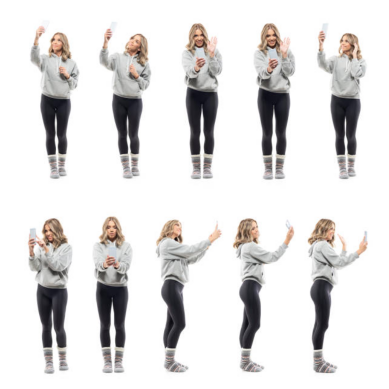

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

img = Image.open("image1.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

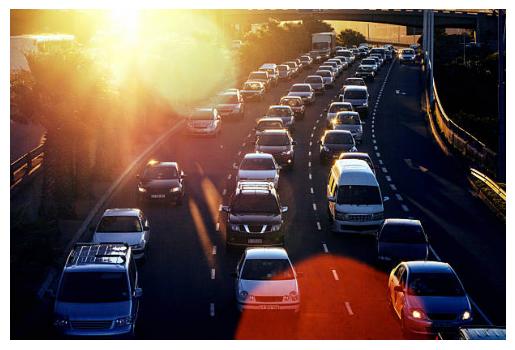

In [3]:
car = Image.open("cars.jpg")
plt.imshow(car)
plt.axis('off')
plt.show()

In [4]:
image_classifier = pipeline('image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [5]:
image_classifier(img)

[{'label': 'sweatshirt', 'score': 0.16330358386039734},
 {'label': 'fur coat', 'score': 0.05426759645342827},
 {'label': 'stole', 'score': 0.034524403512477875},
 {'label': 'maillot', 'score': 0.030565625056624413},
 {'label': 'cardigan', 'score': 0.02732773683965206}]

In [6]:
image_classifier(car)

[{'label': 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
  'score': 0.23224513232707977},
 {'label': 'traffic light, traffic signal, stoplight',
  'score': 0.07387474924325943},
 {'label': 'cab, hack, taxi, taxicab', 'score': 0.06714601069688797},
 {'label': 'car mirror', 'score': 0.05757185444235802},
 {'label': 'racer, race car, racing car', 'score': 0.03285033628344536}]

### Object Detection

In [7]:
# pip install timm

In [8]:
object_detection = pipeline("object-detection", model="hustvl/yolos-small")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [9]:
detections = object_detection(car)
detections[:5]

[{'score': 0.7606406807899475,
  'label': 'car',
  'box': {'xmin': 389, 'ymin': 122, 'xmax': 436, 'ymax': 152}},
 {'score': 0.9669426083564758,
  'label': 'car',
  'box': {'xmin': 447, 'ymin': 258, 'xmax': 518, 'ymax': 316}},
 {'score': 0.7016199827194214,
  'label': 'car',
  'box': {'xmin': 103, 'ymin': 244, 'xmax': 174, 'ymax': 299}},
 {'score': 0.9725622534751892,
  'label': 'car',
  'box': {'xmin': 377, 'ymin': 146, 'xmax': 440, 'ymax': 189}},
 {'score': 0.6686941981315613,
  'label': 'car',
  'box': {'xmin': 464, 'ymin': 261, 'xmax': 575, 'ymax': 403}}]

In [10]:
# Create a drawing context
draw = ImageDraw.Draw(car)

In [11]:
# Draw the bounding boxes and labels
for detection in detections:
    box = detection['box']
    label = detection['label']
    score = detection['score']
    
    # Define the rectangle coordinates
    xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']
    
    # Draw the rectangle
    draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=4)
    
    # Prepare the label text
    text = f"{label}: {score:.2f}"
    
    # Get text size
    text_bbox = draw.textbbox((xmin, ymin), text)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Draw the text background rectangle
    draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill="red")
    
    # Draw the text
    draw.text((xmin, ymin - text_height), text, fill="white")

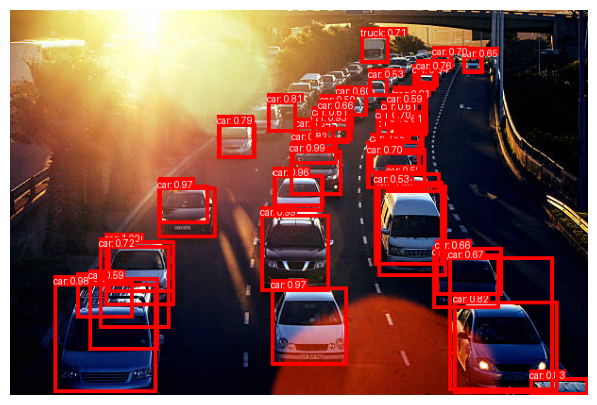

In [12]:
# Display the image using Matplotlib
plt.figure(figsize=(8, 5))
plt.imshow(car)
plt.axis('off')  # Hide the axes
plt.show()

### Image Segmentation

In [13]:
image_segmentation = pipeline('image-segmentation', model="facebook/detr-resnet-50-panoptic")

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:2409: Us

preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manisha\.cache\huggingface\hub\models--facebook--detr-resnet-50-panoptic. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [14]:
segment = image_segmentation(img)
segment

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999015,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.9985,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998949,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998734,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998266,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998968,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998987,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.999427,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998845,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>},
 {'score': 0.998806,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x612>}]

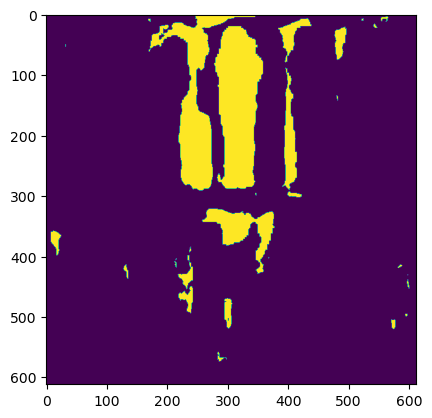

In [16]:
plt.imshow(segment[1]["mask"])